<a href="https://colab.research.google.com/github/Shingirai98/Xhosa_English_Translation/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# library imports
import pandas as pd
import matplotlib.pyplot as plt
import os



In [13]:
def var_init(tag):
  source_language = "en"
  target_language = "xh"
  os.environ["src"] = source_language # Sets them in bash as well, since we often use bash scripts
  os.environ["tgt"] = target_language
  os.environ["tag"] = tag
  tag = tag
  os.environ["gdrive_path"] = "/content/drive/My Drive/m/%s-%s-%s" % (target_language, source_language, tag)


In [7]:
vars = ["noam_0.65lr","baseline-noam", "baseline_10epochs", "baseline"]

In [17]:
var_init(vars[1])
!echo $gdrive_path

/content/drive/My Drive/m/xh-en-baseline-noam


In [27]:
def check_float(potential_float):
    try:
        float(potential_float)
        return True
    except ValueError:
        return False


In [49]:
def toDataFrame(val):
  with open(val) as f:
    for i, line in enumerate(f):
      for word in line.split():
        if check_float(word):
          vals.append(float(word))
        elif word.isdigit():
          vals.append(int(word))

  for i in range(0, len(vals)//5):
    steps.append(vals[5*i])
    loss.append(vals[(5*i)+1])
    ppl.append(vals[(5*i)+2])
    bleu_score.append(vals[(5*i)+3])

  data = {'Steps': steps, 'Loss': loss, 'PPL': ppl, 'bleu':bleu_score}
  df = pd.DataFrame(data) 
  return df

    Steps          Loss       PPL     bleu
0  1000.0  109041.10156  73.91766  0.19118
1  2000.0   93268.50781  39.66772  1.56570
2  3000.0   85527.91406  29.22663  2.32087
3  4000.0   80839.14844  24.28973  3.60188
4  5000.0   77384.58594  21.19426  4.12418
5  6000.0   74894.38281  19.21061  5.16321
6  7000.0   72969.06250  17.80512  5.78062
7  8000.0   71347.20312  16.70127  6.01452


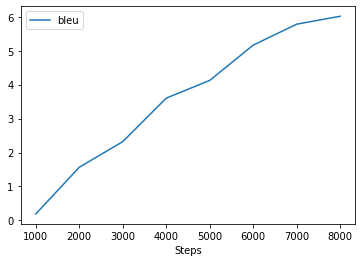

In [55]:
# source_file = 'xhosanavy.' + source_language
# target_file = 'xhosanavy.' + target_language
vals = []
steps = []
loss = []
ppl = []
bleu_score = []
# lr = []
val = "drive/My Drive/m/xh-en-"+vars[1]+"/models/xhen_reverse_transformer/validations.txt"

#skip_lines = []  # Collect the line numbers of the source portion to skip the same lines for the target portion.
 

table1 = toDataFrame(val)
ax = plt.gca()

table1.plot(kind='line',x='Steps',y='bleu',ax=ax)

print(table1)
plt.show()
